# AN√ÅLISIS DE LA ETIQUETA NUTRISCORE

Este proyecto analiza la relaci√≥n entre las caracter√≠sticas nutricionales de los alimentos y su puntuaci√≥n Nutri-Score, utilizando datos de la base Open Food Facts (https://blog.openfoodfacts.org/es/). Nutri-Score es una etiqueta nutricional que clasifica los alimentos en cinco categor√≠as (A a E) seg√∫n su calidad nutricional, siendo "A" la mejor y "E" la peor. El objetivo principal es desarrollar un modelo predictivo que permita estimar tanto la puntuaci√≥n num√©rica (nutriscore_score) como la etiqueta categ√≥rica (nutriscore_grade) a partir de variables como calor√≠as, grasas, az√∫cares y prote√≠nas. Adem√°s, se busca identificar los factores m√°s relevantes en la determinaci√≥n del Nutri-Score as√≠ como sus sesgos.


    1. Importaci√≥n y limpieza de datos
    2. Distribuciones y Outliers
    3. Correlaciones y An√°lisis
    4. Modelizaci√≥n: Regresi√≥n / Clasificaci√≥n
    5. Evaluaci√≥n y problemas

## 1. Importaci√≥n y limpieza de datos

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
data = pd.read_csv('en.openfoodfacts.org.products.csv/en.openfoodfacts.org.products.csv', sep='\t', encoding='utf-8')

C:\Users\rdiaz\AppData\Local\Temp\ipykernel_2216\1225682318.py:1: DtypeWarning: Columns (0,8,13,22,23,27,28,29,31,52,64) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('en.openfoodfacts.org.products.csv/en.openfoodfacts.org.products.csv', sep='\t', encoding='utf-8')


Una vez cargados los datos de la base de datos Open Food Facts debemos analizar cu√°les son las variables que nos ofrece, cu√°les de ellas pueden ser relevantes para el an√°lisis y cu√°les no. Finalmente analizar las escalas y las medidas que se utilizan y si debemos hacer transformaci√≥nes.

In [41]:
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.max_rows', None)     # Mostrar todas las filas
pd.set_option('display.width', 1000) 

data.head()

code                                                url                     creator   created_t      created_datetime  last_modified_t last_modified_datetime                  product_name abbreviated_product_name generic_name quantity packaging packaging_tags packaging_text         brands    brands_tags                               categories                                   categories_tags                         categories_en origins origins_tags origins_en manufacturing_places manufacturing_places_tags         labels       labels_tags         labels_en emb_codes emb_codes_tags first_packaging_code_geo  cities cities_tags purchase_places         stores  countries countries_tags countries_en                                   ingredients_text   allergens  allergens_en traces traces_tags traces_en serving_size  serving_quantity  no_nutriments  additives_n  additives additives_tags additives_en  ingredients_from_palm_oil_n  ingredients_from_palm_oil  \
0         0000000000017  http://world-en.openfoodfacts.org/product/0000...                     kiliweb  1529059080  2018-06-15T10:38:00Z       1561463718   2019-06-25T11:55:18Z              Vit√≥ria crackers                      NaN          NaN      NaN       NaN            NaN            NaN            NaN            NaN                                      NaN                                               NaN                                   NaN     NaN          NaN        NaN                  NaN                       NaN            NaN               NaN               NaN       NaN            NaN                      NaN     NaN         NaN             NaN            NaN     France      en:france       France                                                NaN         NaN           NaN    NaN         NaN       NaN          NaN               NaN            NaN          NaN        NaN            NaN          NaN                          NaN                        NaN   
1         0000000000031  http://world-en.openfoodfacts.org/product/0000...                    isagoofy  1539464774  2018-10-13T21:06:14Z       1539464817   2018-10-13T21:06:57Z                         Cacao                      NaN          NaN    130 g       NaN            NaN            NaN            NaN            NaN                                      NaN                                               NaN                                   NaN     NaN          NaN        NaN                  NaN                       NaN            NaN               NaN               NaN       NaN            NaN                      NaN     NaN         NaN             NaN            NaN     France      en:france       France                                                NaN         NaN           NaN    NaN         NaN       NaN          NaN               NaN            NaN          NaN        NaN            NaN          NaN                          NaN                        NaN   
2    000000000003327986  http://world-en.openfoodfacts.org/product/0000...                     kiliweb  1574175736  2019-11-19T15:02:16Z       1574175737   2019-11-19T15:02:17Z     Filetes de pollo empanado                      NaN          NaN      NaN       NaN            NaN            NaN            NaN            NaN                                      NaN                                               NaN                                   NaN     NaN          NaN        NaN                  NaN                       NaN            NaN               NaN               NaN       NaN            NaN                      NaN     NaN         NaN             NaN            NaN      en:es       en:spain        Spain                                                NaN         NaN           NaN    NaN         NaN       NaN          NaN               NaN            NaN          NaN        NaN            NaN          NaN                          NaN                        NaN   
3         0000000000100  http://world-en.openfoodfacts.org/product/0000...

A primera vista se observan muchas variables que no son √∫tiles para el an√°lisis ya que son urls y dem√°s informaci√≥n adicional de la API, intentaremos hacer una selecci√≥n de informaci√≥n relevantes centr√°ndonos en como se construye nuestra variable dependiente: NutriScore.

En este caso tnemos 2 opciones de variable dependiente ya que la puntuaci√≥n NutriScore tiene una escala num√©rica de -15 a 40 y una escala categ√≥rica de "E" hasta "A". A continuaci√≥n se muestra la tabla de equivalencias:

![alt text](image.png)

Teniendo en cuenta que necesitamos esta variable en nuestro dataset eliminaremos todas aquellas filas con datos faltantes en la variable dependiente.

In [42]:
pd.set_option('display.max_info_rows', 100000)  # comando de pandas para que se muestren todas las filas
pd.set_option('display.max_info_columns', 100000) 

print(data.shape)

data = data.dropna(subset = ['nutriscore_score'])

data.shape

(1701965, 184)


(643898, 184)

Se ha reducido el tama√±o del dataset eliminando alimentos no identificados con eqtiqueta, a continuaci√≥n nos aseguramos que no haya datos faltantes en nuestras variables nutriscore_score y nutriscore_grade

In [43]:
print(data['nutriscore_score'].isnull().sum())
print(data['nutriscore_grade'].isnull().sum())

0
0


Seguidamente es preciso identificar c√≥mo se contruye el nutriscore, as√≠ determinar qu√© variables podr√≠an aportar informaci√≥n relvante a nuestro modelo de predicci√≥n.

Las variables dependientes:

- nutriscore_score: el valor num√©rico en la escala nutriscore --> num√©rica discreta
- nutriscore_grade: la calificaci√≥n final asignada --> categ√≥rica

En primer lugar deber√≠amos mantener informaci√≥n b√°sica de los alimentos para que sean identificables:

- product_name: nombre del producto  --> categ√≥rica
- pnns_groups_2: grupos alimenticios  --> categ√≥rica

Seguidamente debemos guardar la informaci√≥n nutricional m√°s importante:

- energy-kcal_100g: calor√≠as por 100 gramos --> num√©rica continua
- fat_100g: grasas por 100 gramos --> num√©rica continua
- saturated-fat_100g: grasas saturadas por 100 gramos --> num√©rica continua
- carbohydrates_100g: carbohidrtaos por 100 gramos --> num√©rica continua
- sugars_100g: az√∫cares por 100 gramos --> num√©rica continua
- fiber_100g: fibra por 100 gramos --> num√©rica continua
- protein_100g: proteinas por 100 gramos --> num√©rica continua
- salt_100g: sal por 100 gramos --> num√©rica continua
- additives_n: n√∫mero de aditivos --> num√©rica disscreta

In [44]:
columnas_relevantes = [
    "product_name",
    "pnns_groups_2",
    "energy-kcal_100g",
    "fat_100g",
    "saturated-fat_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "additives_n",
    "nutriscore_score",
    "nutriscore_grade"
]

data_1 = data[columnas_relevantes]

data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 643898 entries, 3 to 1701957
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   product_name        object 
 1   pnns_groups_2       object 
 2   energy-kcal_100g    float64
 3   fat_100g            float64
 4   saturated-fat_100g  float64
 5   carbohydrates_100g  float64
 6   sugars_100g         float64
 7   fiber_100g          float64
 8   proteins_100g       float64
 9   salt_100g           float64
 10  additives_n         float64
 11  nutriscore_score    float64
 12  nutriscore_grade    object 
dtypes: float64(10), object(3)
memory usage: 68.8+ MB


¬øTenemos datos faltantes en nuestro nuevo dataFrame?

In [45]:
data_1.isnull().sum()

product_name            2177
pnns_groups_2              0
energy-kcal_100g       42211
fat_100g                1677
saturated-fat_100g      1697
carbohydrates_100g      1946
sugars_100g             1688
fiber_100g            268905
proteins_100g           1677
salt_100g               1264
additives_n           173127
nutriscore_score           0
nutriscore_grade           0
dtype: int64

Para resolver el problema de los datos faltantes hay diferentes opciones:

- Imputar valores: opci√≥n que descartamos debido a la dificultad para imputar valores como fibra o additivos en base otros criterios
- Eliminar variables: si tuvi√©ramos variables que pens√°ramos que pod√≠an ser irrelevantes o poco importantes las podr√≠amos eliminar
- Eliminar las observaciones faltantes: debido a la gran muestra que tenemos de mas de 600.000 alimentos optar√© por eliminar aquellos sin datos para todas las variables, si la muestra final sigue siendo suficiente habr√° sido la mejor opci√≥n

In [46]:
# Tenemos en cuenta que la categoria de grupos aliemntiicos "unknown" debe ser NaN

data_1['pnns_groups_2'] = data_1['pnns_groups_2'].replace('unknown', np.nan)

C:\Users\rdiaz\AppData\Local\Temp\ipykernel_2216\1557557105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['pnns_groups_2'] = data_1['pnns_groups_2'].replace('unknown', np.nan)


In [47]:
data_1 = data_1.dropna(subset = (columnas_relevantes))
data_1.info()
data_1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 253596 entries, 68 to 1701765
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   product_name        object 
 1   pnns_groups_2       object 
 2   energy-kcal_100g    float64
 3   fat_100g            float64
 4   saturated-fat_100g  float64
 5   carbohydrates_100g  float64
 6   sugars_100g         float64
 7   fiber_100g          float64
 8   proteins_100g       float64
 9   salt_100g           float64
 10  additives_n         float64
 11  nutriscore_score    float64
 12  nutriscore_grade    object 
dtypes: float64(10), object(3)
memory usage: 27.1+ MB


product_name          0
pnns_groups_2         0
energy-kcal_100g      0
fat_100g              0
saturated-fat_100g    0
carbohydrates_100g    0
sugars_100g           0
fiber_100g            0
proteins_100g         0
salt_100g             0
additives_n           0
nutriscore_score      0
nutriscore_grade      0
dtype: int64

Finalmente conseguimos un dataset con nuestras variables importantes muy completo y con buena cantidad observaciones ‚úÖ

## 2. Distribuciones y Outliers

Una vez contruido el data set y tratados los datos faltantes cabe estudiar las variables que vamos a emplear, veamos sus distribuciones en histogramas

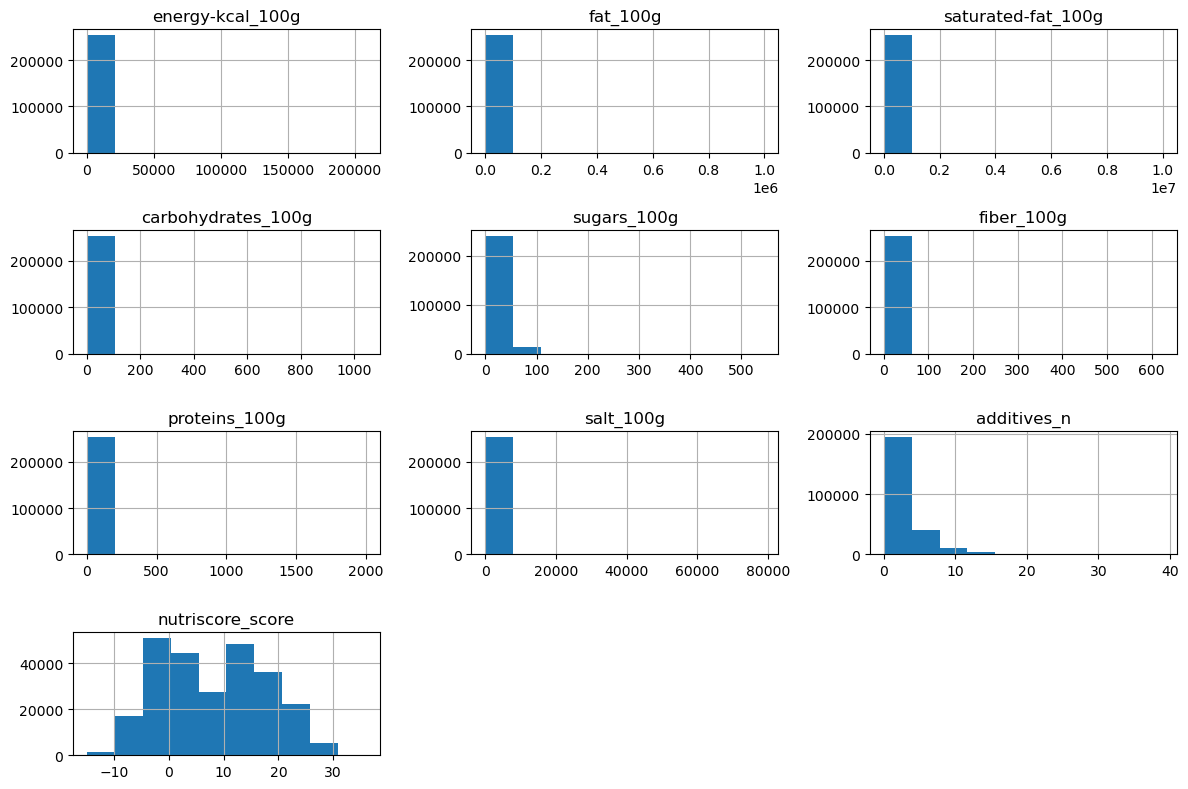

In [48]:
data_1.hist(figsize=(12, 8), bins=10)
plt.tight_layout()
plt.show()

¬øPuede ser que tengamos un problema de outliers que nos estiran el eje x?

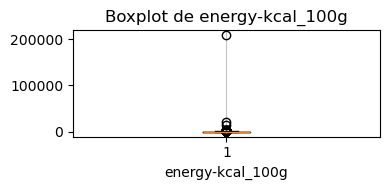

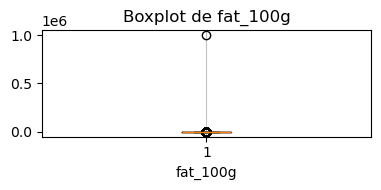

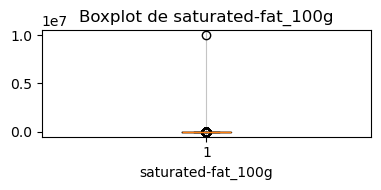

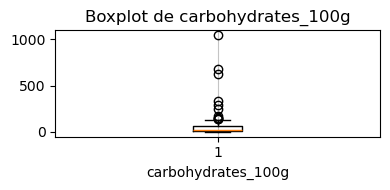

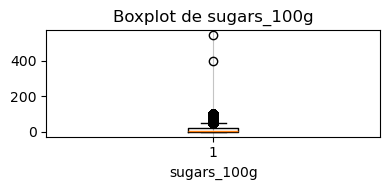

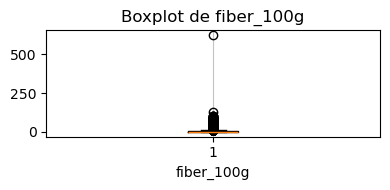

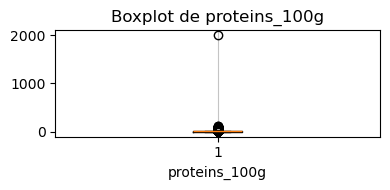

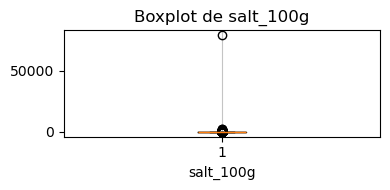

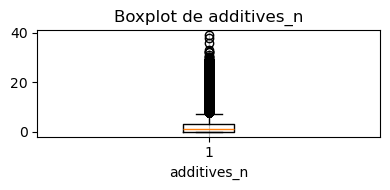

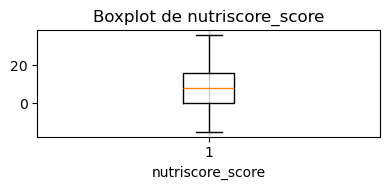

In [49]:
import matplotlib.pyplot as plt

for column in data_1.select_dtypes(include='number'):
    plt.figure(figsize=(4, 2))
    plt.boxplot(data_1[column].dropna(), vert=True)
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.grid(axis='x', alpha=0.75)
    plt.tight_layout()
    plt.show()

Debemos aplicar el IQR para eliminar los outliers de nuestras variables nutricionales, definiremos una funci√≥n

In [50]:
def filtro_outliers_relajado(df, columnas):

    Q1 = df[columnas].quantile(0.25)
    Q3 = df[columnas].quantile(0.75)
    IQR = Q3 - Q1

    limite_inf = Q1 - 1.5 * IQR
    limite_sup = Q3 + 1.5 * IQR

    condicion = (df[columnas] >= limite_inf) & (df[columnas] <= limite_sup)
    df_filtrado = df[condicion.all(axis=1)]

    return df_filtrado

In [51]:
columnas_filtro = ["energy-kcal_100g",
    "fat_100g",
    "saturated-fat_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "additives_n"]



data_2 = filtro_outliers_relajado(data_1, columnas_filtro)

Una vez aplicada la funci√≥n veamos como quedan las distribuciones de nuestras variables

In [52]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173677 entries, 68 to 1701760
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   product_name        object 
 1   pnns_groups_2       object 
 2   energy-kcal_100g    float64
 3   fat_100g            float64
 4   saturated-fat_100g  float64
 5   carbohydrates_100g  float64
 6   sugars_100g         float64
 7   fiber_100g          float64
 8   proteins_100g       float64
 9   salt_100g           float64
 10  additives_n         float64
 11  nutriscore_score    float64
 12  nutriscore_grade    object 
dtypes: float64(10), object(3)
memory usage: 18.6+ MB


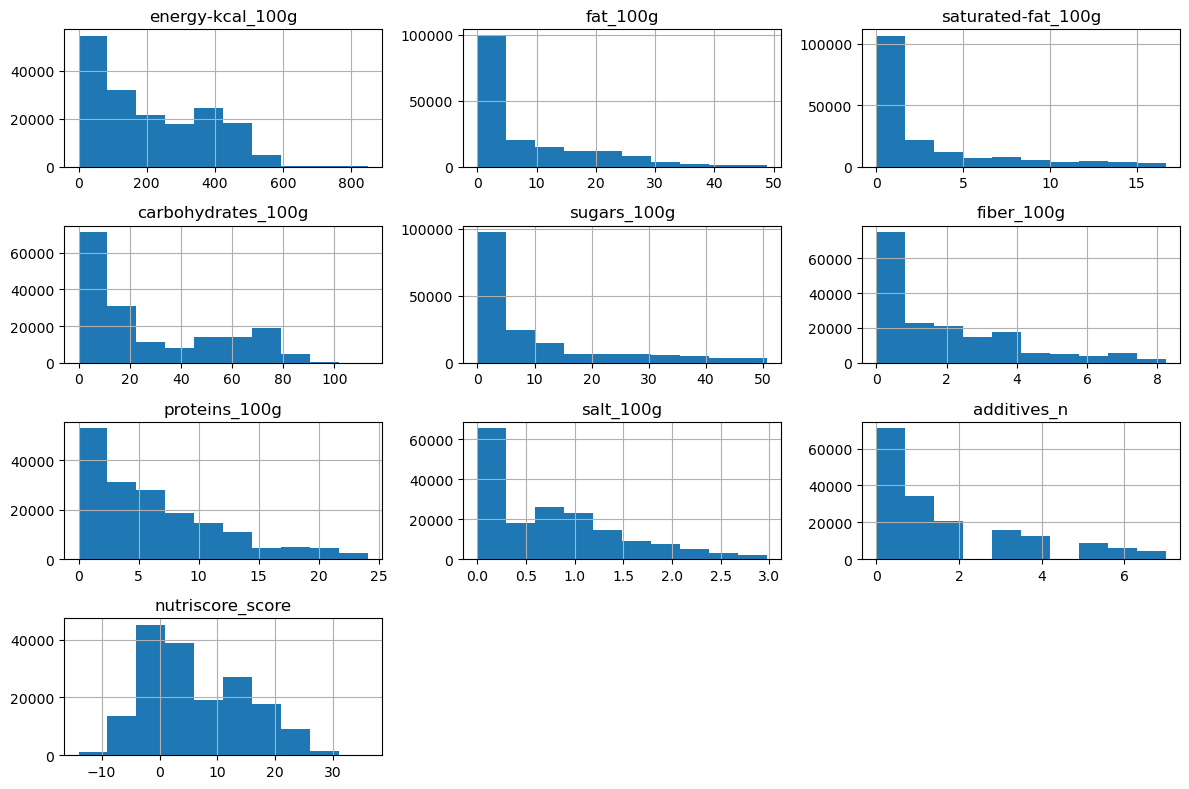

In [53]:
data_2.hist(figsize=(12, 8), bins=10)  
plt.tight_layout()
plt.show()

Ahora se visualizan claramente las distribuciones de nuestras variables que son en su mayor√≠a asim√©tricas a la izquierda porque la mayoria de los alimentos tienen valores bajos de estos componentes. A excepci√≥n de nuestra variable dependiente cuyos valores se concentran alrededor del 0.

En consecuencia debemos tener en cuenta que las medidas de tendencia central como la media ser√°n malos indicadores de centralidad de nuestras variables, la moda y la mediana ser√°n m√°s acertadas. Como observamos en la tabla inferior, la media a veces est√° m√°s cercana al percentil 75 que a la mediana (percentil 50).

In [54]:
data_2.describe()

energy-kcal_100g       fat_100g  saturated-fat_100g  carbohydrates_100g    sugars_100g     fiber_100g  proteins_100g     salt_100g    additives_n  nutriscore_score
count     173677.000000  173677.000000       173677.000000       173677.000000  173677.000000  173677.000000  173677.000000  173677.00000  173677.000000     173677.000000
mean         210.715074       7.950009            2.620390           28.123528       9.642918       1.844428       6.344949       0.73848       1.648877          5.673492
std          159.310075       9.898449            3.943810           26.754720      12.291682       2.003120       5.686830       0.70006       1.941342          8.647407
min            0.000000       0.000000            0.000000            0.000000       0.000000       0.000000       0.000000       0.00000       0.000000        -14.000000
25%           66.000000       0.490000            0.000000            6.250000       1.300000       0.000000       1.600000       0.10000       0.000000         -1.000000
50%          171.000000       3.300000            0.620000           15.000000       4.000000       1.300000       5.100000       0.62000       1.000000          3.000000
75%          356.000000      13.000000            3.570000           52.000000      12.500000       3.000000       9.500000       1.15000       3.000000         13.000000
max          848.000000      48.800000           16.670001          113.000000      50.700000       8.240000      24.070000       2.97250       7.000000         36.000000

Ya hemos analizado las variables num√©ricas pero a√∫n no hemos tratado con nuestra variable de grupos alimenticios observ√©mosla para ver sus caracter√≠sticas y determinar su relevancia para el modelo.

In [55]:
data_2['pnns_groups_2'].value_counts() ### Tiene un exceso de categor√≠as deber√≠amos intentar reducirlas para facilitar la futura interpretaci√≥n del modelo

pnns_groups_2
Biscuits and cakes                  19604
One-dish meals                      16423
Cereals                             16295
Dressings and sauces                15473
Milk and yogurt                     11199
Bread                                9344
Vegetables                           8743
Processed meat                       6259
Sweets                               6095
Fish and seafood                     6047
Fruits                               6025
Sweetened beverages                  5221
Meat                                 4733
Unsweetened beverages                4580
vegetables                           4405
Cheese                               4332
Appetizers                           3545
Legumes                              3018
Pizza pies and quiche                2973
Plant-based milk substitutes         2547
Breakfast cereals                    2465
Fruit juices                         1814
Ice cream                            1574
Artificially sweeten

In [56]:
agrupaciones = {
    # Grupo: Panader√≠a y Reposter√≠a
    'Biscuits and cakes': 'Pan y Dulces',
    'pastries': 'Pan y Dulces',
    'Bread': 'Pan y Dulces',
    'Breakfast cereals': 'Pan y Dulces',
    
    # Grupo: L√°cteos
    'Milk and yogurt': 'L√°cteos',
    'Cheese': 'L√°cteos',
    'Dairy desserts': 'L√°cteos',
    'Plant-based milk substitutes': 'L√°cteos',
    
    # Grupo: Bebidas
    'Sweetened Bebidas y Refrescos': 'Bebidas y Refrescos',
    'Unsweetened Bebidas y Refrescos': 'Bebidas y Refrescos',
    'Teas and herbal teas and coffees': 'Bebidas y Refrescos',
    'Artificially sweetened Bebidas y Refrescos': 'Bebidas y Refrescos',
    'Waters and flavored waters': 'Bebidas y Refrescos',
    'Fruit juices': 'Bebidas y Refrescos',
    'Fruit nectars': 'Bebidas y Refrescos',
    'Alcoholic Bebidas y Refrescos': 'Bebidas y Refrescos',
    
    # Grupo: Carnes y Pescados
    'Processed meat': 'Carnes y Pescados',
    'Meat': 'Carnes y Pescados',
    'Fish and seafood': 'Carnes y Pescados',
    'Offals': 'Carnes y Pescados',
    
    # Grupo: Vegetales y Frutas
    'Vegetables': 'Frutas y Verduras',
    'Fruits': 'Frutas y Verduras',
    'legumes': 'Frutas y Verduras',
    'vegetables': 'Frutas y Verduras',
    'fruits': 'Frutas y Verduras',
    'Legumes': 'Frutas y Verduras',
    'Dried fruits': 'Frutas y Verduras',
    'Nuts': 'Frutas y Verduras',
    'nuts': 'Frutas y Verduras',
    
    # Grupo: Productos Grasos
    'Dressings and sauces': 'Fats & Oils',
    'Fats': 'Fats & Oils',
    
    # Grupo: Platos preparados
    'One-dish meals': 'Comidas Preparadas',
    'Pizza pies and quiche': 'Comidas Preparadas',
    'Pizza pies and quiches': 'Comidas Preparadas',
    'Sandwiches': 'Comidas Preparadas',
    'Appetizers': 'Comidas Preparadas',
    'Soups': 'Comidas Preparadas',
    
    # Grupo: Snacks y Dulces
    'Sweets': 'Snacks',
    'Chocolate products': 'Snacks',
    'Ice cream': 'Snacks',
    'Salty and fatty products': 'Snacks',
    
    # Grupo: Otros
    'Eggs': 'Others',
    'Potatoes': 'Others',
    'cereals': 'Others',
}

data_2['pnns_groups_2_agrupado'] = data_2['pnns_groups_2'].replace(agrupaciones)

data_2['pnns_groups_2_agrupado'].value_counts()

C:\Users\rdiaz\AppData\Local\Temp\ipykernel_2216\3720642312.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['pnns_groups_2_agrupado'] = data_2['pnns_groups_2'].replace(agrupaciones)


pnns_groups_2_agrupado
Pan y Dulces                        32194
Comidas Preparadas                  24966
Frutas y Verduras                   23124
L√°cteos                             19194
Carnes y Pescados                   17162
Fats & Oils                         16322
Cereals                             16295
Snacks                               9162
Sweetened beverages                  5221
Unsweetened beverages                4580
Bebidas y Refrescos                  2513
Artificially sweetened beverages     1532
Others                               1406
Alcoholic beverages                     6
Name: count, dtype: int64

Una vez resumia la variable cabe determinar si es o no relevante para el modelo. C√≥mo tenemos 2 variables dependientes contemplamos realizar 2 tests estad√≠sticos de significancia, uno respecto a nutriscore_score y otro respecto a nutriscore_grade.

- Para determinar la relevancia de nuestra variable categ√≥rica respecto a la dependiente categ√≥rica necesitamos un test de Chi_cuadrado para evaluar esta relaci√≥n y determinar su significancia estad√≠stica.

- Para determinar la relevancia respecto a nutriscore_score en cambio, necesitaremos hacer un test ANOVA.

In [57]:
# Test Chi2

from scipy.stats import chi2_contingency

# Creo una tabla de contingencia
tabla_contingencia = pd.crosstab(data_2['pnns_groups_2_agrupado'], data_2['nutriscore_grade'])

# Test de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print(f"Estad√≠stico Chi-cuadrado: {chi2}")
print(f"Valor p: {p}") 

Estad√≠stico Chi-cuadrado: 111969.36956110365
Valor p: 0.0


In [58]:
# Test ANOVA

from scipy.stats import f_oneway

# Separar las observaciones por categor√≠a
grupos = [group['nutriscore_score'].values for name, group in data_2.groupby('pnns_groups_2_agrupado')]

# Test ANOVA
f_stat, p_value = f_oneway(*grupos)

print(f"Estad√≠stico F: {f_stat}")
print(f"Valor p: {p_value}")

Estad√≠stico F: 7672.529957194326
Valor p: 0.0


En ambos casos tenemos p-values inferiores a 0,05, por lo tanto, debemos incluir nuestra variable a ambos modelos.

## 3. Correlaciones y An√°lisis

Analizaremos la potencial relaci√≥n entre la variable dependiente y las diferentes variables predictoras.

Antes de analizar nuestras variables cabe puntualizar como estan especificadas nuestras variables dependientes:

- nutrscore_score: puntuaci√≥n num√©rica del nutriscore donde los valores m√°s bajos equivalen a una mejor puntuaci√≥n y los m√°s altos a una peor
- nutriscore_grade: equivalencia en etiquetas en funci√≥n de la variable num√©rica de la A a la E.

Seguidamente elaboramos gr√°ficos de dispersi√≥n para identificar patrones y etndencias entre nuestra variable dependiente y los predictores

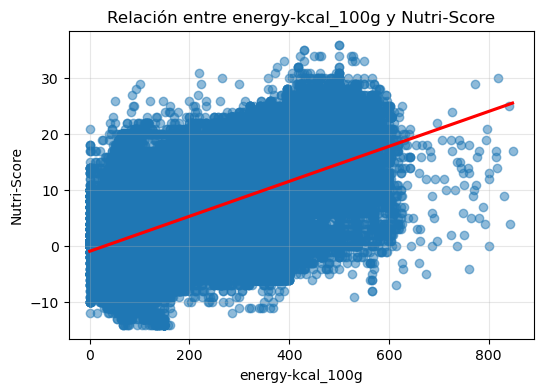

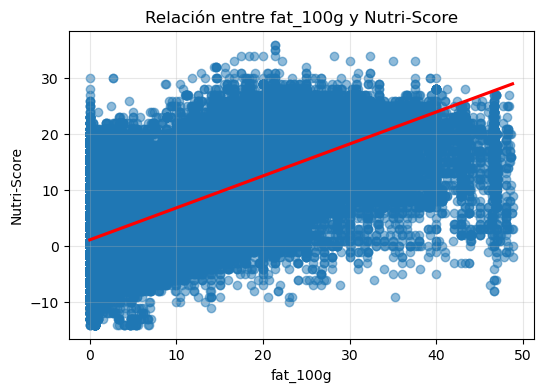

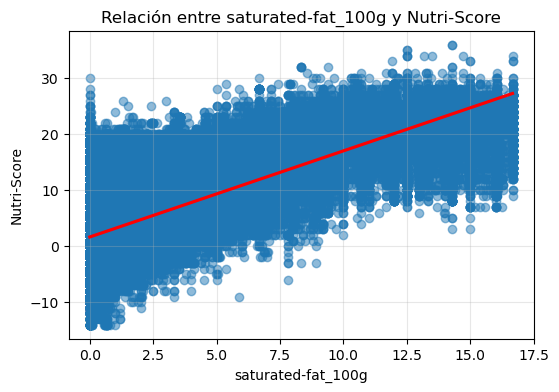

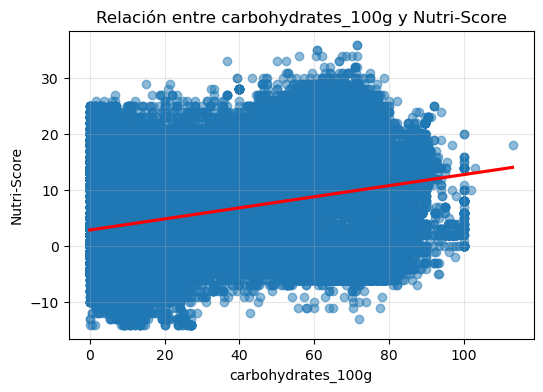

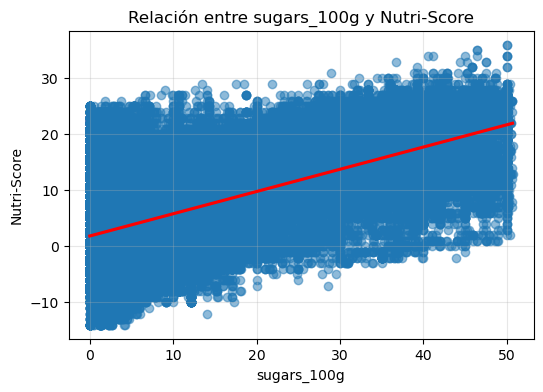

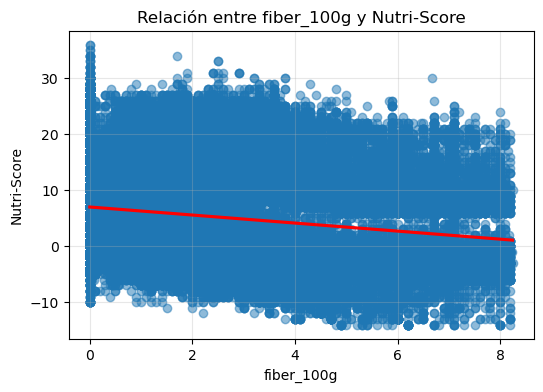

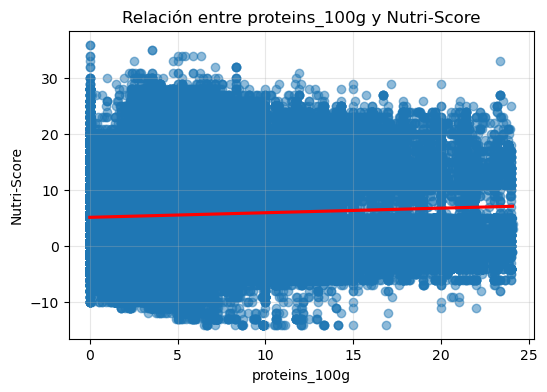

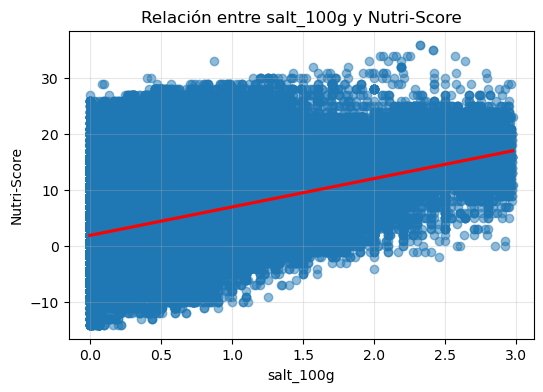

In [59]:
predictoras = ['energy-kcal_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
               'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g']

for columna in predictoras:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=columna, y='nutriscore_score', data=data_2, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f'Relaci√≥n entre {columna} y Nutri-Score')
    plt.xlabel(columna)
    plt.ylabel('Nutri-Score')
    plt.grid(alpha=0.3)
    plt.show()

Claramente hay variables que parecen tener una relaci√≥n positiva con el nutriscore, es decir, a mayores valores de grasas, calor√≠as, az√∫cares y sal; peores valores del nutriscore (m√°s altos). En cambio, la fibra tiene una relaci√≥n negativa y por tanto propiciar√≠a una mejor etiqueta en nuestra escalara valorativa. Otros como las prote√≠nas parecen no tener una relaci√≥n clara.

Veamos a continuaci√≥n la relaci√≥n entre las variables az√∫cares y calor√≠as para identificar patrones entre variables predictoras.

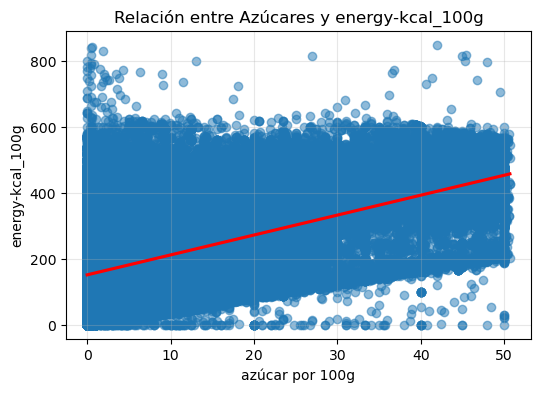

In [60]:
plt.figure(figsize=(6, 4))
sns.regplot(x='sugars_100g', y='energy-kcal_100g', data=data_2, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title(f'Relaci√≥n entre Az√∫cares y energy-kcal_100g')
plt.xlabel('az√∫car por 100g')
plt.ylabel('energy-kcal_100g')
plt.grid(alpha=0.3)
plt.show()

Vemos una relaci√≥n positiva, a continuaci√≥n a√±adire los colores de las etiquetas de nutriscore para identificar como se ubican en este grafico las etiquetas

In [61]:
data_2['nutriscore_grade'] = data_2['nutriscore_grade'].str.upper()

data_2['nutriscore_grade'] = pd.Categorical(data_2['nutriscore_grade'], categories=['A', 'B', 'C', 'D', 'E'], ordered=True)

data_2['nutriscore_grade'].value_counts()

C:\Users\rdiaz\AppData\Local\Temp\ipykernel_2216\3734785150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['nutriscore_grade'] = data_2['nutriscore_grade'].str.upper()
C:\Users\rdiaz\AppData\Local\Temp\ipykernel_2216\3734785150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['nutriscore_grade'] = pd.Categorical(data_2['nutriscore_grade'], categories=['A', 'B', 'C', 'D', 'E'], ordered=True)


nutriscore_grade
A    48804
C    36265
D    36067
B    29955
E    22586
Name: count, dtype: int64

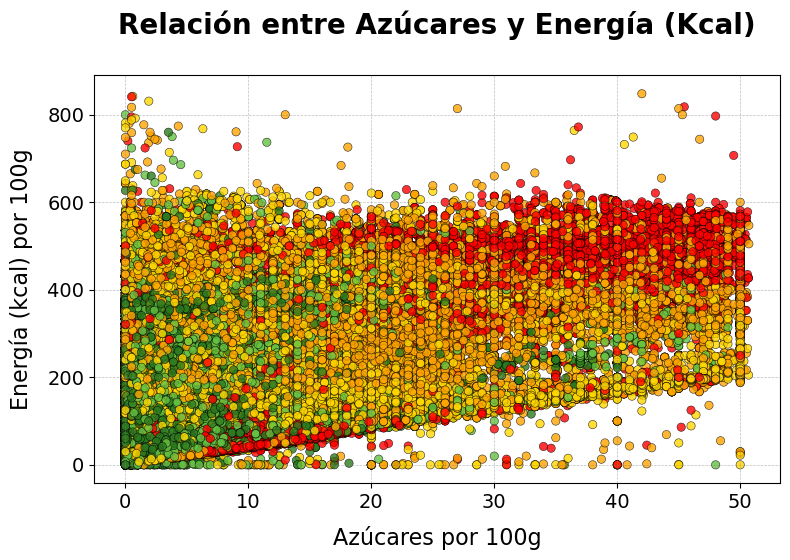

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los colores reales del Nutri-Score
nutriscore_palette = {
    'A': '#2d7a1f',  # Verde oscuro
    'B': '#65c242',  # Verde claro
    'C': '#ffd700',  # Amarillo
    'D': '#ffa500',  # Naranja
    'E': '#ff0000'   # Rojo
}

# Crear el scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='sugars_100g',
    y='energy-kcal_100g',
    data=data_2,
    hue='nutriscore_grade',    # Colorear seg√∫n el Nutri-Score grade
    palette=nutriscore_palette,  # Usar la paleta personalizada
    alpha=0.8,                 # Mayor transparencia para m√°s claridad
    edgecolor='black',         # Borde en los puntos para mayor definici√≥n
    linewidth=0.4,
    legend=False              # Grosor del borde
)

# Personalizaci√≥n del gr√°fico
plt.title(
    'Relaci√≥n entre Az√∫cares y Energ√≠a (Kcal)', 
    fontsize=20, weight='bold', pad=30  # Aumentar separaci√≥n con el subt√≠tulo
)

plt.xlabel('Az√∫cares por 100g', fontsize=16, labelpad=10)
plt.ylabel('Energ√≠a (kcal) por 100g', fontsize=16, labelpad=10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Ajustar la cuadr√≠cula
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)



# Ajustar m√°rgenes globales
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Reducir el margen superior
plt.show()


Observamos como abundan los alimentos con puntuaciones E (rojas) en el cuadrante superior derecho donde se concentran los productos con mayores valores de calor√≠as y az√∫cares. En cambio, la etiqueta A (verde oscuro) se concentra en el cuadrante inferior izquierdo en productos con bajos valores de ambas variables.

Grafiquemos tambi√©n algunos grupos de alimentos m√°s relevantes para determinar su distribuci√≥n respecto a las etiquetas de nutriscore.

C:\Users\rdiaz\AppData\Local\Temp\ipykernel_2216\2955657712.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['pnns_groups_2_agrupado'] = pd.Categorical(


<Figure size 800x600 with 0 Axes>

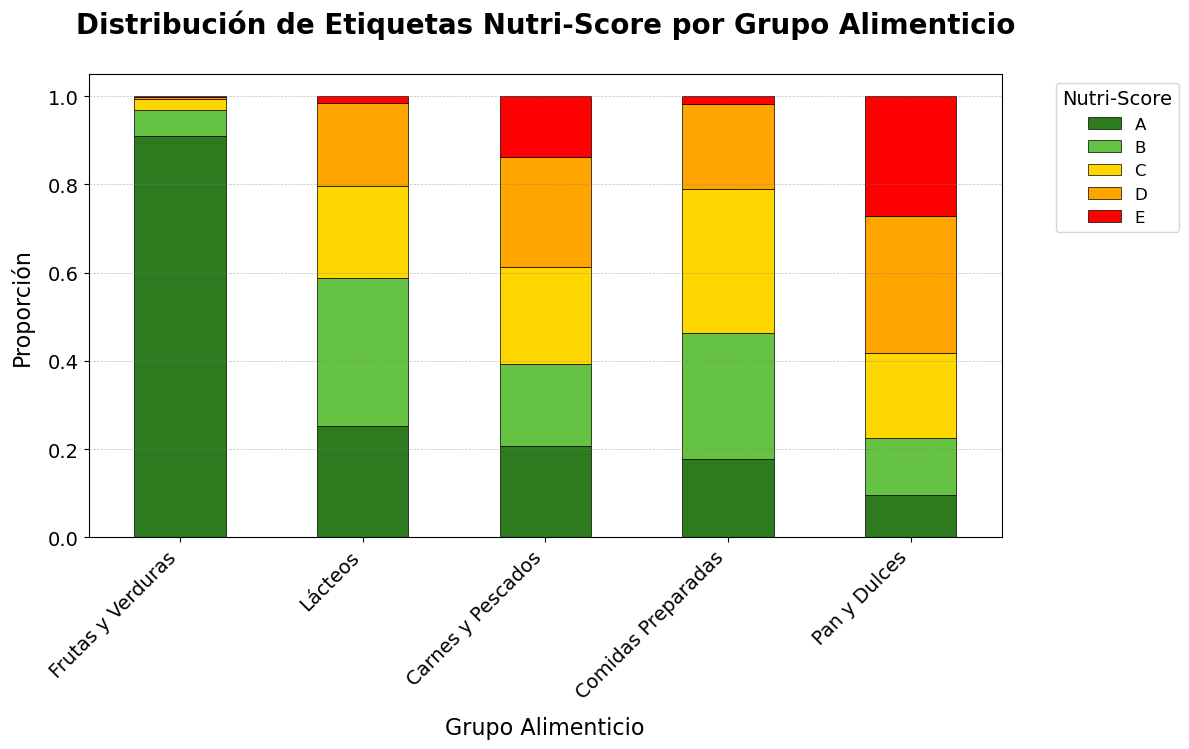

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Orden deseado para los grupos alimenticios
desired_groups = ['Frutas y Verduras', 'L√°cteos', 'Carnes y Pescados', 'Comidas Preparadas', 'Pan y Dulces']

# Filtrar datos seg√∫n los grupos deseados
filtered_data = data_2[data_2['pnns_groups_2_agrupado'].isin(desired_groups)]

# Asegurar que los grupos est√©n en el orden correcto
filtered_data['pnns_groups_2_agrupado'] = pd.Categorical(
    filtered_data['pnns_groups_2_agrupado'], categories=desired_groups, ordered=True
)

# Crear tabla de contingencia (proporciones de Nutri-Score por grupo alimenticio)
contingencia = pd.crosstab(
    filtered_data['pnns_groups_2_agrupado'],
    filtered_data['nutriscore_grade'],
    normalize='index'
)

# Crear el gr√°fico de barras apiladas
plt.figure(figsize=(8, 6))
ax = contingencia.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    color=[nutriscore_palette[grade] for grade in contingencia.columns],
    edgecolor='black',  # Borde en las barras para mayor definici√≥n
    linewidth=0.5
)

# T√≠tulo principal
plt.title(
    'Distribuci√≥n de Etiquetas Nutri-Score por Grupo Alimenticio', 
    fontsize=20, weight='bold', pad=30
)

plt.xlabel('Grupo Alimenticio', fontsize=16, labelpad=10)
plt.ylabel('Proporci√≥n', fontsize=16, labelpad=10)
plt.xticks(fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=14)
plt.legend(
    title='Nutri-Score', 
    title_fontsize=14, 
    fontsize=12, 
    bbox_to_anchor=(1.05, 1), 
    loc='upper left'
)

plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5, axis='y')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Para poder confirmar estas relaciones observadas en los gr√°ficos anteriores debemos calcular la correlaci√≥n entre las distintas variables.

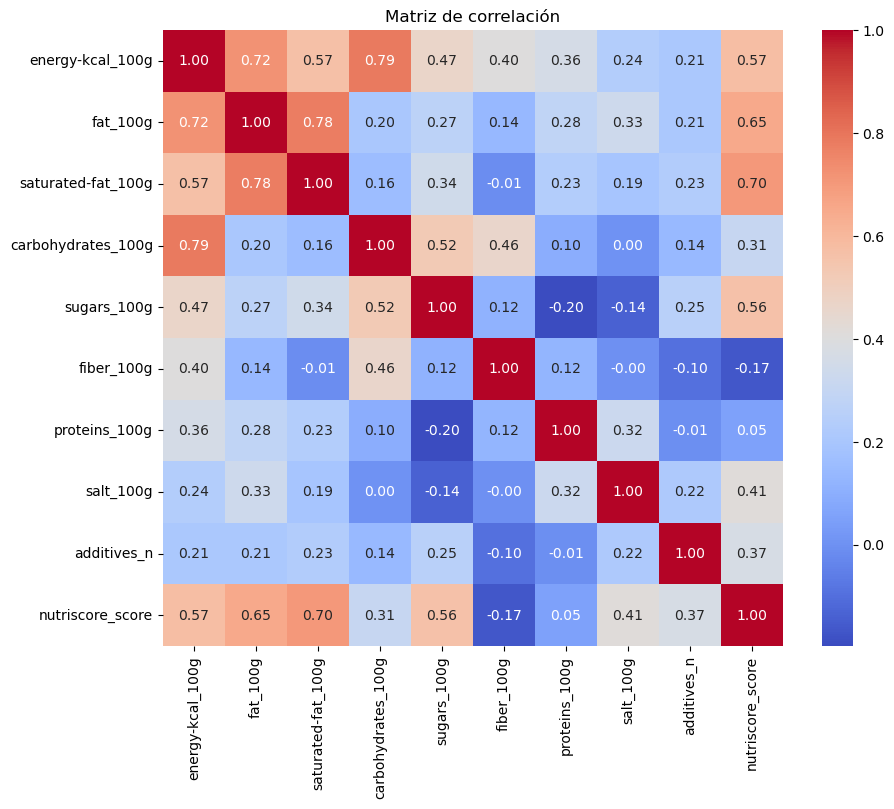

In [64]:
numerical_columns = data_2.select_dtypes(include='number').columns

correlaciones = data_2[numerical_columns].corr()

plt.figure(figsize=(10, 8))  # Ajustar el tama√±o de la figura
sns.heatmap(correlaciones, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de correlaci√≥n")
plt.show()


Confirmamos las relaciones observadas gr√°ficamente:

- energ√≠a (kcal), grasas, grasas saturadas y az√∫cares: tienen fuerte correlaci√≥n positiva (0,5 - 1) --> aumentos de estas variables correlacionan con valores m√°s altos y negativos de nutriscore
- sal, n√∫mero de aditivos y prote√≠nas: tienen ligera correlaci√≥n positiva (0 - 0,5) --> aumentos de estas variables correlacionan con valores ligeramente m√°s altos y ligeramente m√°s negativos de nutriscore
- fibra : correlaci√≥n ligeramente negativa (0 - -0,5) --> aumentos de estas variables correlacionan con valores ligeramente m√°s bajos y m√°s positivos de nutriscore 

## 4. Modelo de regresi√≥n / clasificaci√≥n

A continuaci√≥n elaboraremos un modelo de regresi√≥n para nuestra variable nutriscore_score y un modelo de clasificaci√≥n para nutriscore_grade, con las diferentes variables que hemos trabajado anteriormente



Primeramente debemos transformar nuestra variable categ√≥rica, utilizaremos el One-Hot_Emcoding para que no exista un orden entre las variables

In [65]:
# One-Hot Encoding
data_encoded = pd.get_dummies(data_2, columns=['pnns_groups_2_agrupado'], drop_first=True)

El siguiente paso para elaborar un modelo es la divisi√≥n de nuestro dataset en conjunto de entrenamiento y prueba

In [66]:
from sklearn.model_selection import train_test_split

dummy_columns = [col for col in data_encoded.columns if col.startswith('pnns_groups_2_agrupado')]

X = data_encoded[dummy_columns + ['energy-kcal_100g', 'fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'additives_n']]

y_score = data_encoded['nutriscore_score']
y_grade = data_encoded['nutriscore_grade']

X_train, X_test, y_train_score, y_test_score = train_test_split(X, y_score, test_size=0.3, random_state=42)
_, _, y_train_grade, y_test_grade = train_test_split(X, y_grade, test_size=0.3, random_state=42)


Debemos estandarizar nuestra escala, ya que sobre todo la regresi√≥n log√≠stica es sensible a la diferencia de escalas, aunque debemos excluir la variable categ√≥rica de esta transformaci√≥n.

In [67]:
# Seleccionar columnas num√©ricas
num_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# Filtrar solo las columnas num√©ricas
X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]


from sklearn.preprocessing import StandardScaler

# Crear el escalador
scaler = StandardScaler()

# Estandarizar los datos num√©ricos
X_train_scaled_num = scaler.fit_transform(X_train_num)
X_test_scaled_num = scaler.transform(X_test_num)

# Combinar columnas num√©ricas escaladas y categ√≥ricas originales
X_train_scaled = pd.concat(
    [pd.DataFrame(X_train_scaled_num, columns=num_columns, index=X_train.index),
     X_train.drop(columns=num_columns)],
    axis=1
)

X_test_scaled = pd.concat(
    [pd.DataFrame(X_test_scaled_num, columns=num_columns, index=X_test.index),
     X_test.drop(columns=num_columns)],
    axis=1
)



Aplicamos el modelo de regresi√≥n lineal

In [68]:
from sklearn.linear_model import LinearRegression

model_reg = LinearRegression()
model_reg.fit(X_train, y_train_score)


LinearRegression()

A continuaci√≥n evaluamos el funcionamiento del mismo

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_score = model_reg.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test_score, y_pred_score)}")
print(f"MSE: {mean_squared_error(y_test_score, y_pred_score)}")
print(f"RMSE: {mean_squared_error(y_test_score, y_pred_score, squared=False)}")
print(f"R¬≤: {r2_score(y_test_score, y_pred_score)}")


MAE: 2.164391356810657
MSE: 8.151071284453787
RMSE: 2.8550081058473
R¬≤: 0.8912345082858971


c:\Users\rdiaz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Parece que el modelo tiene un buen desempe√±o, los errores tiene valores relativamente bajos y el R cuadrado es 0.88 muy cercano a 1, es decir explicamos bastante parte de la varianza del modelo. Veamos a continuaci√≥n el gr√°fico de relaci√≥n entre las variables predichas y reales.

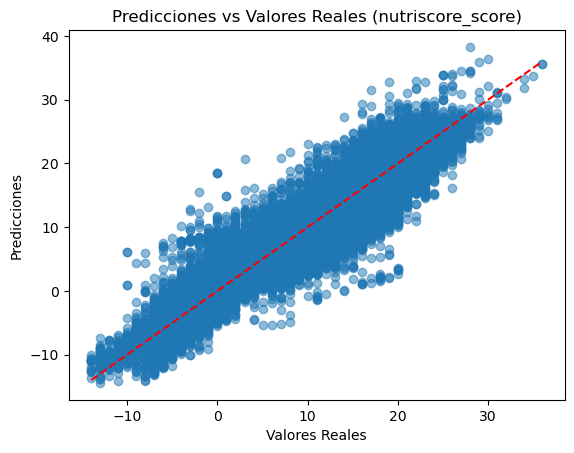

In [70]:
import matplotlib.pyplot as plt

plt.scatter(y_test_score, y_pred_score, alpha=0.5)
plt.plot([y_test_score.min(), y_test_score.max()], [y_test_score.min(), y_test_score.max()], '--', color='red')
plt.title('Predicciones vs Valores Reales (nutriscore_score)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()

Una relaci√≥n muy buena entre predicciones y valores reales, el modelo parece funcionar bastante bien.

A continuaci√≥n llevaremos a cabo el mismo m√©todo para el modelo de clasificaci√≥n y observaremos si podemos predecir con mayor exactitud la variable nutriscore_grade o nutriscore_score

In [71]:
from sklearn.ensemble import RandomForestClassifier

model_clf = RandomForestClassifier(random_state=42)
model_clf.fit(X_train, y_train_grade)

RandomForestClassifier(random_state=42)

Exactitud: 0.8939620758483033
Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

           A       0.96      0.95      0.96     14617
           B       0.86      0.86      0.86      8945
           C       0.85      0.85      0.85     10852
           D       0.86      0.89      0.87     10885
           E       0.92      0.89      0.90      6805

    accuracy                           0.89     52104
   macro avg       0.89      0.89      0.89     52104
weighted avg       0.89      0.89      0.89     52104



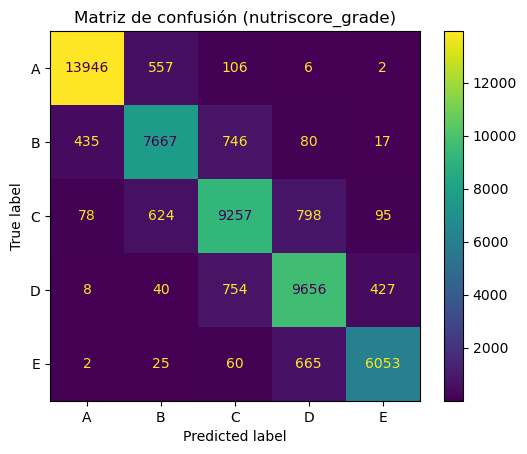

In [72]:
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

y_pred_grade = model_clf.predict(X_test)

print(f"Exactitud: {accuracy_score(y_test_grade, y_pred_grade)}")
print("Reporte de clasificaci√≥n:")
print(classification_report(y_test_grade, y_pred_grade))

ConfusionMatrixDisplay.from_estimator(model_clf, X_test, y_test_grade)
plt.title('Matriz de confusi√≥n (nutriscore_grade)')
plt.show()

El modelo de clasificaci√≥n random forest parece tener un buen desempe√±o tambi√©n, su nivel de exactitud llega al 89%, todas las categor√≠as de nutriscore_grade se han predicho con una exactitud y fiabilidad bastante alta.

Para hacer una interpretaci√≥n y an√°lisis de los modelos es necesario evaluar los coeficientes de los modelos


In [73]:
import statsmodels.api as sm

X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Paso 2: Agregar la constante
X_train_sm = sm.add_constant(X_train)

# Paso 3: Ajustar el modelo
model_sm = sm.OLS(y_train_score, X_train_sm)
result_sm = model_sm.fit()

# Mostrar resultados
print(result_sm.summary())

                            OLS Regression Results                            
Dep. Variable:       nutriscore_score   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                 4.929e+04
Date:                Tue, 28 Jan 2025   Prob (F-statistic):               0.00
Time:                        19:00:51   Log-Likelihood:            -3.0041e+05
No. Observations:              121573   AIC:                         6.009e+05
Df Residuals:                  121552   BIC:                         6.011e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

Observamos el efecto esperado en la mayor√≠a de variables excepto en prote√≠nas, donde la relaci√≥n inciial parec√≠a ser positiva pero en este caso es negativa, es decir, mayores valores de prote√≠nas reportar√°n mejores etiqetas de nutriscore. Los predictores con valores m√°s significativamente altos son sal, az√∫car y grasas que aumentan el valor de la variable dependiente reportando peores etiquetas.

Respecto a nuestras dummies los coeficientes que propician peores etiquetas de nutriscore son las bebidas ya que muchas de las bebidas contenidas en ese subgrupo son bebidas azucaradas, en cambio las frutas y verduras propician claramente mejores etiquetas de nutriscore. Los cereales son la √∫nica dummy no significativa de nuestro modelo.

Cabes destacar que todas las variables (excepto dummy de cereales) tienen un p-value menor a 0.05, lo cual indica que son significativos.

A continuaci√≥n vemos un gr√°fico de relevancia de los coeficientes en el modelo de clasificaci√≥n, los resultados son muy coherentes respecto al modelo de regresi√≥n donde "sal" es la variable con un valor m√°s alto y el n√∫mero de aditivos la menos importante. De las dummies las bebidas son el grupo con mayor efecto en el modelo, en este caso efecto a empeorar nuestra etiqueta nutriscore.

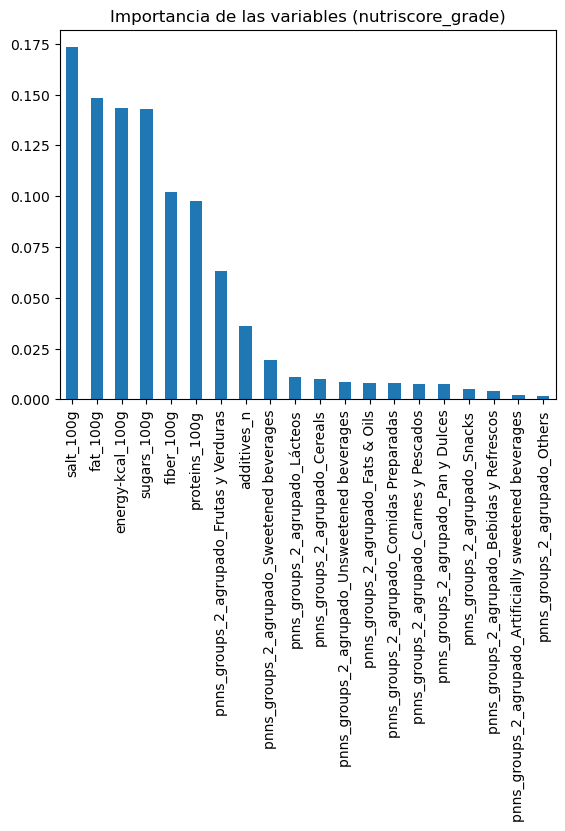

In [74]:
importances = pd.Series(model_clf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Importancia de las variables (nutriscore_grade)')
plt.show()

## 5. Evaluaci√≥n y problemas

Aunque el modelo parece funcionar bastante bien debemos tener en cuenta que puede estar presentando unos resultados irreales debido a problemas estad√≠sticos. El primer potencial problema de nuestro modelo puede ser la multicolinealidad entre variables que est√©n muy relacionadas, estudiemos la colinearidad del modelo.

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcular VIF para cada predictor
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data)

                                             Variable        VIF
0   pnns_groups_2_agrupado_Artificially sweetened ...   1.058414
1          pnns_groups_2_agrupado_Bebidas y Refrescos   1.011601
2            pnns_groups_2_agrupado_Carnes y Pescados   3.341267
3                      pnns_groups_2_agrupado_Cereals   3.327650
4           pnns_groups_2_agrupado_Comidas Preparadas   2.297092
5                  pnns_groups_2_agrupado_Fats & Oils   1.770961
6            pnns_groups_2_agrupado_Frutas y Verduras   1.486065
7                      pnns_groups_2_agrupado_L√°cteos   1.534371
8                       pnns_groups_2_agrupado_Others   1.036224
9                 pnns_groups_2_agrupado_Pan y Dulces   5.154505
10                      pnns_groups_2_agrupado_Snacks   1.895311
11         pnns_groups_2_agrupado_Sweetened beverages   1.065303
12       pnns_groups_2_agrupado_Unsweetened beverages   1.020677
13                                   energy-kcal_100g  22.835808
14                      

Parece que la variable de calor√≠as tiene un VIF muy alto y puede estar altamente correlacionada con el resto de variable de nuestro modelo, podr√≠amos optar por eliminarla del modelo ya que a pesar de ser significativa su coeficiente en la regresi√≥n era muy bajo: 0.0090. De todas formas el resto de m√©tricas indican que nuestro modelo es bastante explicativo y coherente.

Por √∫ltimo vamos a comprara los errores del set de entrenamiento y el de prueba ya que si nuestro set de entrenamiento funciona ostensiblemente mejor que nuestro set de prueba puede existir un problema de sobreajuste del modelo, nuestro modelo no estar√≠a aprendiendo sino copiando datos

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predicciones en ambos conjuntos
y_train_pred = model_reg.predict(X_train)
y_test_pred = model_reg.predict(X_test)

# M√©tricas para el conjunto de entrenamiento
mae_train = mean_absolute_error(y_train_score, y_train_pred)
mse_train = mean_squared_error(y_train_score, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train_score, y_train_pred)

# M√©tricas para el conjunto de prueba
mae_test = mean_absolute_error(y_test_score, y_test_pred)
mse_test = mean_squared_error(y_test_score, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test_score, y_test_pred)

# Comparaci√≥n de resultados
print(f"Entrenamiento - MAE: {mae_train}, MSE: {mse_train}, RMSE: {rmse_train}, R¬≤: {r2_train}")
print(f"Prueba - MAE: {mae_test}, MSE: {mse_test}, RMSE: {rmse_test}, R¬≤: {r2_test}")

Entrenamiento - MAE: 2.1751367166735123, MSE: 8.199720285610939, RMSE: 2.863515371987889, R¬≤: 0.8902405259762963
Prueba - MAE: 2.164391356810657, MSE: 8.151071284453787, RMSE: 2.8550081058473, R¬≤: 0.8912345082858971


No hay sobre ajuste en regresi√≥n, los errores son equiparables

In [81]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Predicciones en ambos conjuntos
y_train_pred = model_clf.predict(X_train)
y_test_pred = model_clf.predict(X_test)

# M√©tricas para el conjunto de entrenamiento
accuracy_train = accuracy_score(y_train_grade, y_train_pred)
roc_auc_train = roc_auc_score(y_train_grade, model_clf.predict_proba(X_train), multi_class='ovr')

# M√©tricas para el conjunto de prueba
accuracy_test = accuracy_score(y_test_grade, y_test_pred)
roc_auc_test = roc_auc_score(y_test_grade, model_clf.predict_proba(X_test), multi_class='ovr')

# Comparaci√≥n de resultados
print(f"Entrenamiento - Accuracy: {accuracy_train}, ROC-AUC: {roc_auc_train}")
print(f"Prueba - Accuracy: {accuracy_test}, ROC-AUC: {roc_auc_test}")

Entrenamiento - Accuracy: 0.9972609049706761, ROC-AUC: 0.9999500050970787
Prueba - Accuracy: 0.8939620758483033, ROC-AUC: 0.9872862382500116


Desgraciadamente observamos se√±ales de sobreajuste en nuestro modelo de clasificaci√≥n, el moelo predice casi perfecto el conjunto de entrenamiento a diferencia que los datos test que llegan al 89%. Deeber√≠amos replantear corregir este sobreajuste o tomar como referencia nuestro modelo de regresi√≥n en su defecto

# Conclusi√≥n

El NutriScore parece ser una medida bastante completa para determinar cuan saludable es un alimento, emplea muchas caracter√≠sticas nutricionales de los alimentos y tiende a ser consistente en su sesgo. De todas formas, la alimentaci√≥n es un tema muy complejo y valorar los alimentos sin tener en cuenta la cantidad consumida o la frecuencia de cada alimento puede no ser lo m√°s adecuado para ainformar correctamente al consumidor sobre su consumo.

Cabe destacar que NutriScore ha evolucionado en ese aspecto y ha habido revisiones peri√≥dicas para tener en cuenta aspectos m√°s all√° de los nutricionales, un claro ejemplo de ello ha sido el aceite de oliva que se consideraba una C-D en sus inicios debido a altos niveles de calor√≠as y grasas. Posteriormente se le asign√≥ una B. 

Estos casos indican que no todos los modelos son aut√≥nomos a la hora de explicar un fen√≥meno sino que a veces hay que darle un sentido m√°s all√° desde el pensamiento cr√≠tico por parte de los analistas que estan realizando el estudio. En este caso informar a los consumidores es una tarea compleja que adem√°s conlleva una responsabilidad social impl√≠cita.

¬°Espero que haya disfrutado del proyecto! üéâüéâ